<div style="text-align: center; width: 95%; height: 150px;"><img src="https://climate.nasa.gov/system/resources/detail_files/91_Akpatok-Island-April2014_1000x1000.jpg" style="width: 100%; height: auto;"></div>

# A basic but realistic insight about global warming

In this notebook you can find multiple regressions plotted on NASA datasets. Scores and coefficients are shown below. <br>(resources here: https://climate.nasa.gov/).<br>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

## 1) 2D Regressions.

### 1.1) Global earth temperature.

In [54]:
"""
1.1) Global earth temperature anomaly through years (1880-2016).
     Data Source: NASA's Goddard Institute for Space Studies (GISS).
"""

# Reads data.
df_1 = pd.read_fwf('data/647_Global_Temperature_Data_File.txt')

# DATA: Years (X), temperature variation (Y).
x_values = df_1[['Year']]
y_values = df_1[['Temp1']]

# Concatenate data.
df = pd.concat([x_values, y_values], axis=1)
X = df.as_matrix(['Year'])
Y = df.as_matrix(['Temp1'])

X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [17]:
# Linear model (Y = AX + B).
reg = LinearRegression()
reg.fit(X_train, Y_train)
p = reg.predict(X_test).T

print '1.1) Temperature anomaly through years (1880-2016).'
print 'Linear model (Y = AX + B)'
print 'Coeficients: A)', reg.coef_[0][0]
print 'Intercept: B)', reg.intercept_[0]
print 'Score:', reg.score(X_test, Y_test)

1.1) Temperature anomaly through years (1880-2016).
Linear model (Y = AX + B)
Coeficients: A) 0.00710857543482
Intercept: B) -13.8208823211
Score: 0.753064292136


In [18]:
# Polynomial model (Y = A(X + B)^2 + C).

# Dimensionality reduction.
xdata = X_train.flatten()
ydata = Y_train.flatten()

def f(t, a, b, c):
    return a*np.power(t + b, 2) + c

par, cov = curve_fit(f, xdata, ydata, p0=(0.0001, 1880, -0.3))

# Compute score (Sum of squares, Chi-Square).
residuals = ydata - f(xdata, *par)
chi = sum(residuals**2)

print 'Polynomial model (Y = A(X + B)^2 + C)'
print 'Coeficients: A)', par[0], ', B)', par[1], ', C)', par[2]
print 'Chi-Square:', chi, '\n'

Polynomial model (Y = A(X + B)^2 + C)
Coeficients: A) 8.3794093873e-05 , B) -1905.48945688 , C) -0.258570104642
Chi-Square: 1.52467775562 



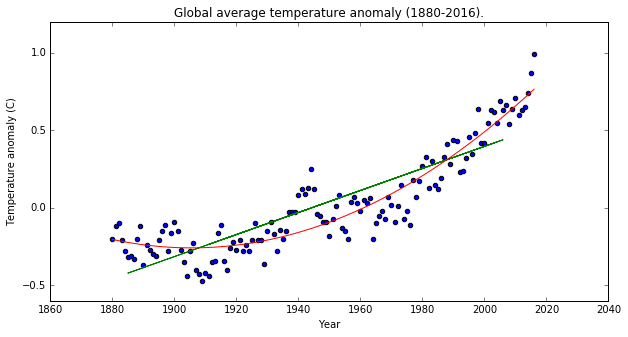

In [22]:
# Graphic visualization.
fig = plt.figure()
fig.set_size_inches(10, 5.0)
plt.scatter(df['Year'], df['Temp1'])
plt.plot(X_test, p[0], color='green')
xline = np.linspace(min(xdata), max(xdata), 500)
plt.plot(xline, f(xline, *par), color='red')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly (C)')
plt.title('Global average temperature anomaly (1880-2016).')
plt.show()

### 1.2) Carbon dioxide.

In [55]:
"""
1.2) CO2 concentration(ppm) through years (1958-2017).
     Data Source: NOAA ESRL DATA.
"""

# Reads data.
df_2 = pd.read_fwf('data/co2_mm_mlo_original.txt')

# DATA: Years (X), CO2 concentration(ppm)(Y).
x_values = df_2[['decimal']]
y_values = df_2[['average']]

# Concatenate data.
df = pd.concat([x_values, y_values], axis=1)
X = df.as_matrix(['decimal'])
Y = df.as_matrix(['average'])

X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [47]:
# Linear model (Y = AX + B).
reg = LinearRegression()
reg.fit(X_train, Y_train)
p = reg.predict(X_test).T

print '1.2) CO2 concentration through years (1958-2017).'
print 'Linear model (Y = AX + B)'
print 'Coeficients: A)', reg.coef_[0][0]
print 'Intercept: B)', reg.intercept_[0]
print 'Score:', reg.score(X_test, Y_test)

1.2) CO2 concentration through years (1958-2017).
Linear model (Y = AX + B)
Coeficients: A) 1.53358328092
Intercept: B) -2695.99514821
Score: 0.976573029518


In [48]:
# Polynomial model (Y = A(X + B)^2 + C).

# Dimensionality reduction.
xdata = X_train.flatten()
ydata = Y_train.flatten()

def f(t, a, b, c):
    return a*np.power(t + b, 2) + c

par, cov = curve_fit(f, xdata, ydata, p0=(0.3, 1965, 315))

# Compute score (Sum of squares, Chi-Square).
residuals = ydata - f(xdata, *par)
chi = sum(residuals**2)

print 'Polynomial model (Y = A(X + B)^2 + C)'
print 'Coeficients: A)', par[0], ', B)', par[1], ', C)', par[2]
print 'Chi-Square:', chi, '\n'

Polynomial model (Y = A(X + B)^2 + C)
Coeficients: A) 0.0125248109098 , B) -1926.70764365 , C) 302.011299891
Chi-Square: 3074.05114803 



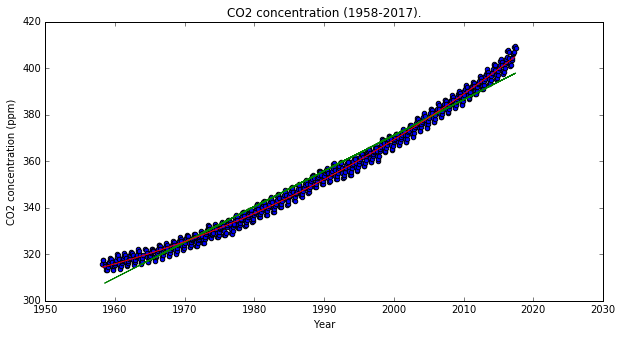

In [50]:
# Graphic visualization.
fig = plt.figure()
fig.set_size_inches(10, 5.0)
plt.scatter(df['decimal'], df['average'])
plt.plot(X_test, p[0], color='green')
xline = np.linspace(min(xdata), max(xdata), 500)
plt.plot(xline, f(xline, *par), color='red')
plt.xlabel('Year')
plt.ylabel('CO2 concentration (ppm)')
plt.title('CO2 concentration (1958-2017).')
plt.show()
#TODO
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### 1.3) Land ice (GreenLand Mass Variation).

In [51]:
"""
1.3) GreenLand Mass Variation through years (2002-2017).
     Data Source: Wiese, D. N., D.-N. Yuan, C. Boening, F. W. Landerer and
     M. M. Watkins (2016) JPL GRACE Mascon Ocean, Ice, and Hydrology Equivalent
     HDR Water Height RL05M.1 CRI Filtered Version 2., Ver. 2., PO.DAAC, CA, USA.
     Dataset accessed [2017-08-07] at http://dx.doi.org/10.5067/TEMSC-2LCR5.
"""

# Reads data.
df_3 = pd.read_fwf('data/greenland_mass_200204_201701.txt')

# DATA: Years (X), Mass Variation(Gt)(Y).
x_values = df_3[['Year']]
y_values = df_3[['Mass']]

# Concatenate data.
df = pd.concat([x_values, y_values], axis=1)
X = df.as_matrix(['Year'])
Y = df.as_matrix(['Mass'])

X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [29]:
# Linear model (Y = AX + B).
reg = LinearRegression()
reg.fit(X_train, Y_train)
p = reg.predict(X_test).T

print '1.3) GreenLand Mass Variation (2002-2017).'
print 'Linear model (Y = AX + B)'
print 'Coeficients: A)', reg.coef_[0][0]
print 'Intercept: B)', reg.intercept_[0]
print 'Score:', reg.score(X_test, Y_test), '\n'

1.3) GreenLand Mass Variation (2002-2017).
Linear model (Y = AX + B)
Coeficients: A) -279.034068767
Intercept: B) 558933.57068
Score: 0.966125905427 



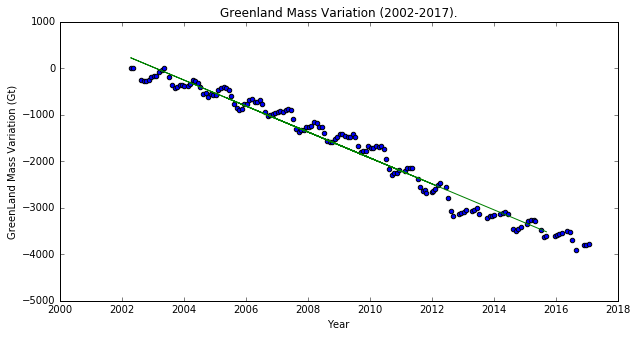

In [30]:
# Graphic visualization.
fig = plt.figure()
fig.set_size_inches(10, 5.0)
plt.scatter(df['Year'], df['Mass'])
plt.plot(X_test, p[0], color='green')
plt.xlabel('Year')
plt.ylabel('GreenLand Mass Variation (Gt)')
plt.title('Greenland Mass Variation (2002-2017).')
plt.show()

### 1.4) Sea level.

In [52]:
"""
1.4) Global Mean Sea Level variation(mm) through years(1993-2017).
     Data Source: GSFC. 2017. Global Mean Sea Level Trend from
     Integrated Multi-Mission Ocean Altimeters TOPEX/Poseidon,
     Jason-1, OSTM/Jason-2 Version 4. Ver. 4. PO.DAAC, CA, USA.
     Dataset accessed [2017-08-07] at 10.5067/GMSLM-TJ124.
"""

# Reads data.
df_4 = pd.read_fwf('data/GMSL_TPJAOS_V4_199209_201704.txt')

# DATA: Years (X), Sea level variation(mm)(Y).
x_values = df_4[['Year']]
y_values = df_4[['GMSL']]

# Concatenate data.
df = pd.concat([x_values, y_values], axis=1)
X = df.as_matrix(['Year'])
Y = df.as_matrix(['GMSL'])

X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [32]:
# Linear model (Y = AX + B).
reg = LinearRegression()
reg.fit(X_train, Y_train)
p = reg.predict(X_test).T

print '1.4) Sea height variation (1993-2017).'
print 'Linear model (Y = AX + B)'
print 'Coeficients: A)', reg.coef_[0][0]
print 'Intercept: B)', reg.intercept_[0]
print 'Score:', reg.score(X_test, Y_test), '\n'

1.4) Sea height variation (1993-2017).
Linear model (Y = AX + B)
Coeficients: A) 3.18706926439
Intercept: B) -6393.67773779
Score: 0.91187042774 



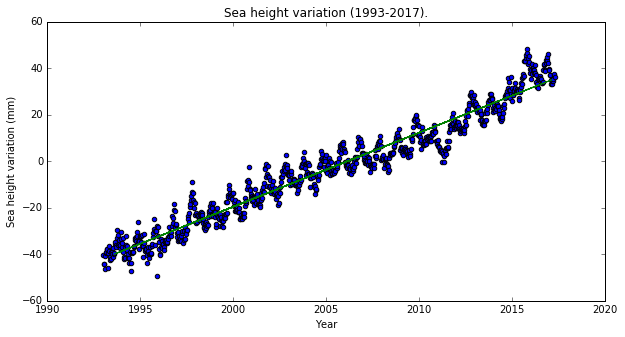

In [33]:
# Graphic visualization.
fig = plt.figure()
fig.set_size_inches(10, 5.0)
plt.scatter(df['Year'], df['GMSL'])
plt.plot(X_test, p[0], color='green')
plt.xlabel('Year')
plt.ylabel('Sea height variation (mm)')
plt.title('Sea height variation (1993-2017).')
plt.show()

## 2) 3D Regressions.

### 2.1) Greenland mass loss and CO2 concentration.

In [53]:
"""
2.1) Greenland mass loss and CO2 concentration through years (2003-2016).
     Data source: (Shown above).
"""

# Reads data.
df_5 = pd.read_fwf('data/greenland_mass_200204_201608.txt')
df_6 = pd.read_fwf('data/co2_mm_mlo.txt')

# DATA: Years (X), CO2 concentration (Y), Greenland mass loss (Z).
x_values = df_6[['date']]
y_values = df_6[['average']]
z_values = df_5[['massloss']]

# Concatenate data.
df = pd.concat([x_values, y_values, z_values], axis=1)

X = df.as_matrix(['date'])
Y = df.as_matrix(['average', 'massloss']).astype('float32')

X_train, X_test, Y_train, Y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [40]:
# Linear model.
reg = LinearRegression()
reg.fit(X_train, Y_train)

print '2.1) Greenland mass loss and CO2 concentration through years (2003-2016).'
print 'Coeficients:', reg.coef_[0][0], ',', reg.coef_[1][0]
print 'Intercept:', reg.intercept_[0]
print 'Score:', reg.score(X_test, Y_test)

2.1) Greenland mass loss and CO2 concentration through years (2003-2016).
Coeficients: 2.1033287213 , 284.912536585
Intercept: -3838.57204343
Score: 0.980298156997


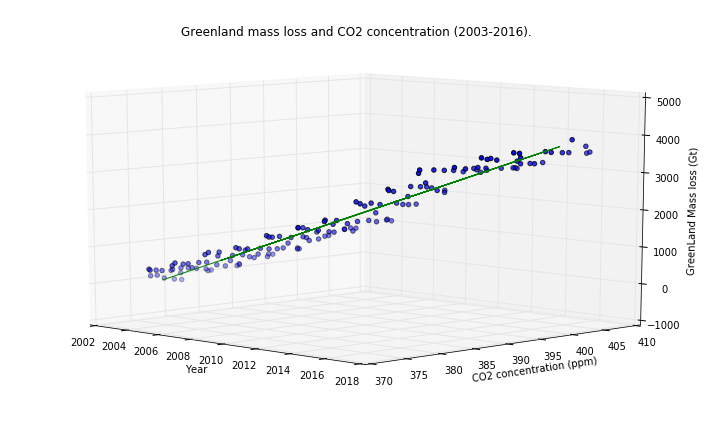

In [41]:
p = reg.predict(X_test).T

# Graphic visualization.
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Year'); ax.set_ylabel('CO2 concentration (ppm)'); ax.set_zlabel('GreenLand Mass loss (Gt)')
ax.scatter(xs=df['date'], ys=df['average'], zs=df['massloss'])
ax.plot(xs=X_test, ys=p[0], zs=p[1], color='green')
ax.view_init(10, -45)
plt.title('Greenland mass loss and CO2 concentration (2003-2016).')
plt.show()